In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import graphviz
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report, roc_auc_score
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz

In [3]:
df = pd.read_csv('C:/data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
#Check for Missing Values
null=pd.DataFrame(df.isnull().sum(),columns=["Null Values"])
null["% Missing Values"]=(df.isna().sum()/len(df)*100)
null = null[null["% Missing Values"] > 0]
null.style.background_gradient(cmap='viridis',low =0.2,high=0.1)

,Null Values,% Missing Values


In [4]:
#Dropping the Customer ID, and replacing some ' ' values in the TotalCharges column
df = df.drop(['customerID'], axis = 1)
df['TotalCharges'] = df['TotalCharges'].replace(' ', 0)
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [5]:
#Replacing 'No Service' with just 'No'
replace_cols = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df[replace_cols] = df[replace_cols].replace('No internet service', 'No')
df[replace_cols] = df[replace_cols].replace('No phone service', 'No')

In [6]:
#Standardizing Numerical Columns
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler= StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

#Turning Yes/No Columns into 0/1 Integers
objconv_cols = ['Churn', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']
df[objconv_cols] = df[objconv_cols].replace({'Yes': 1, 'No': 0}).astype(int)

#One Hot Encoding for Categorical Columns
cat_cols =['gender', 'PaymentMethod', 'Contract', 'InternetService']
df = pd.get_dummies(df, columns=cat_cols)

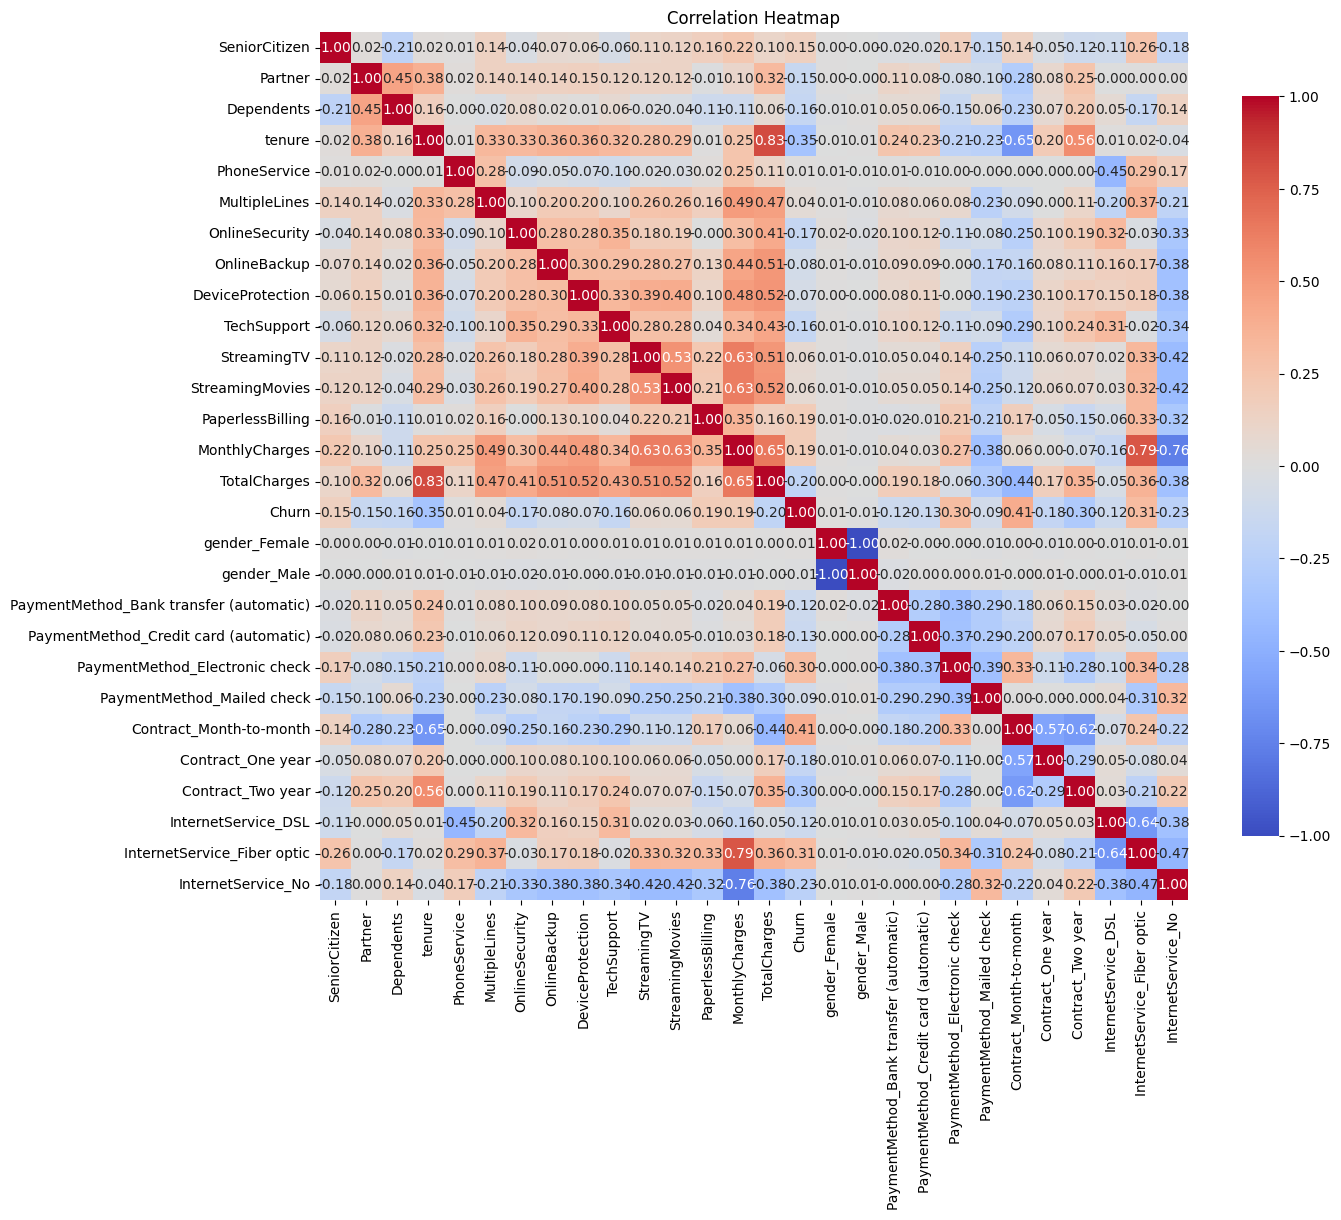

In [11]:
#Heatmap of all variables
corr_matrix = df.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={'shrink': .8})
plt.title('Correlation Heatmap')
plt.show()

In [7]:
#Picking our Xs and Ys
X = df.drop(columns = ['Churn', 'TotalCharges', 'gender_Female', 'PaymentMethod_Mailed check', 'Contract_One year', 'InternetService_No'])
y = df['Churn']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 42)

Accuracy: 0.79
Area Under the ROC Curve (AUC): 0.84


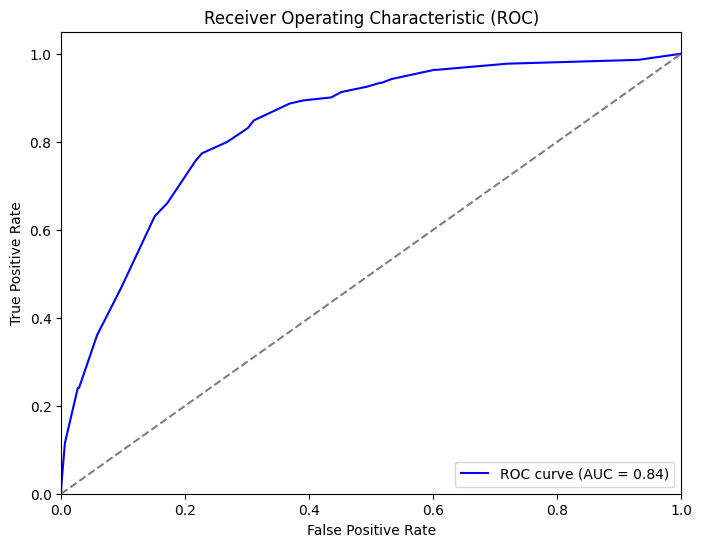

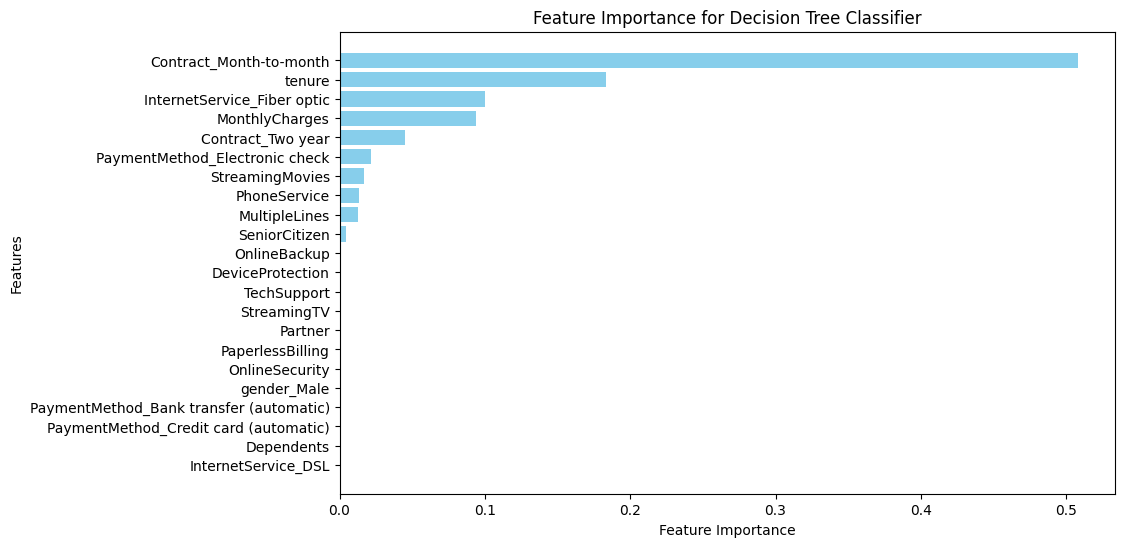

In [9]:
# Train a regression tree
clf_tree = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=5)
clf_tree.fit(X_train, y_train)

y_pred = clf_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

y_proba = clf_tree.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

auc = roc_auc_score(y_test, y_proba)
print(f"Area Under the ROC Curve (AUC): {auc:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Dashed diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Extract feature importance
feature_importance = clf_tree.feature_importances_

def plot_feature_importance(importances, feature_names):
    # Convert feature importance into a pandas DataFrame for better handling
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    })

    # Sort by importance
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title('Feature Importance for Decision Tree Classifier')
    plt.gca().invert_yaxis()
    plt.show()

# Plot feature importance using actual feature names from the DataFrame
plot_feature_importance(feature_importance, X.columns)


In [12]:
dot_data = export_graphviz(
    clf_tree,
    out_file=None,  # Keeps the output in memory instead of writing to file
    feature_names=X_train.columns,
    class_names=['Stay', 'Churn'],
    filled=True,
    rounded=True,
    special_characters=True
)

# Render the .dot file using graphviz
graph = graphviz.Source(dot_data)
graph.render("C:/Data/tree")  # Saves the file as 'tree.pdf'

'C:\\Data\\tree.pdf'

Accuracy: 0.79
Area Under the ROC Curve (AUC): 0.85


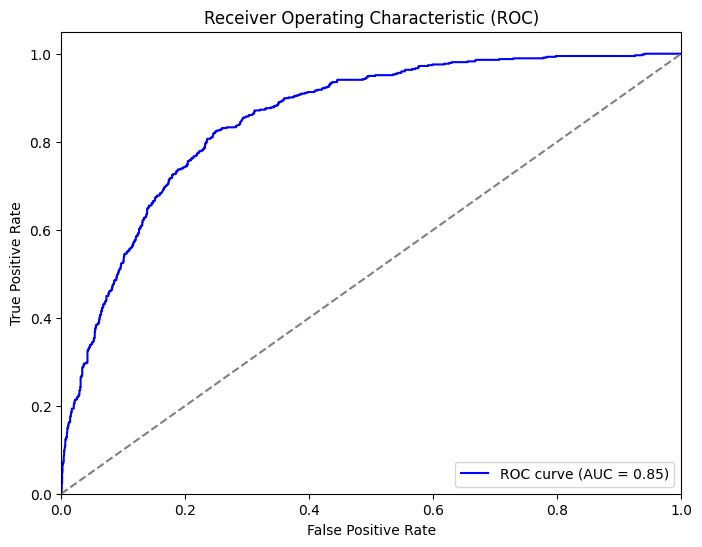

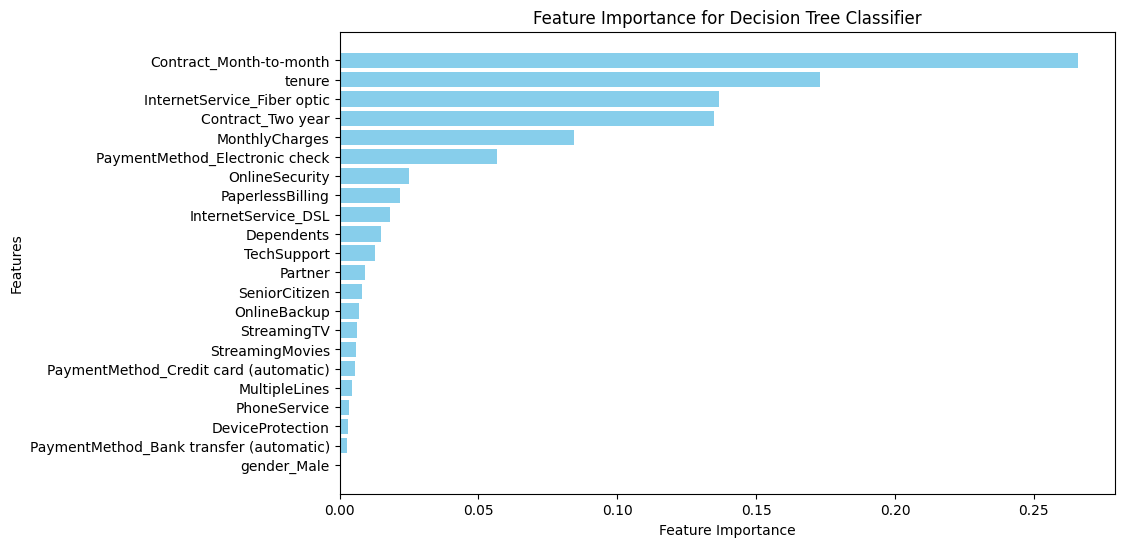

In [33]:
# Train a random forest
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42, criterion='entropy', max_depth=4, min_samples_split=10, min_samples_leaf=5)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

y_proba = rf_clf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

auc = roc_auc_score(y_test, y_proba)
print(f"Area Under the ROC Curve (AUC): {auc:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Dashed diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Extract feature importance
feature_importance = rf_clf.feature_importances_

def plot_feature_importance(importances, feature_names):
    # Convert feature importance into a pandas DataFrame for better handling
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    })

    # Sort by importance
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title('Feature Importance for Decision Tree Classifier')
    plt.gca().invert_yaxis()
    plt.show()

# Plot feature importance using actual feature names from the DataFrame
plot_feature_importance(feature_importance, X.columns)

OOB Accuracy: 0.7879
Area Under the ROC Curve (AUC): 0.85


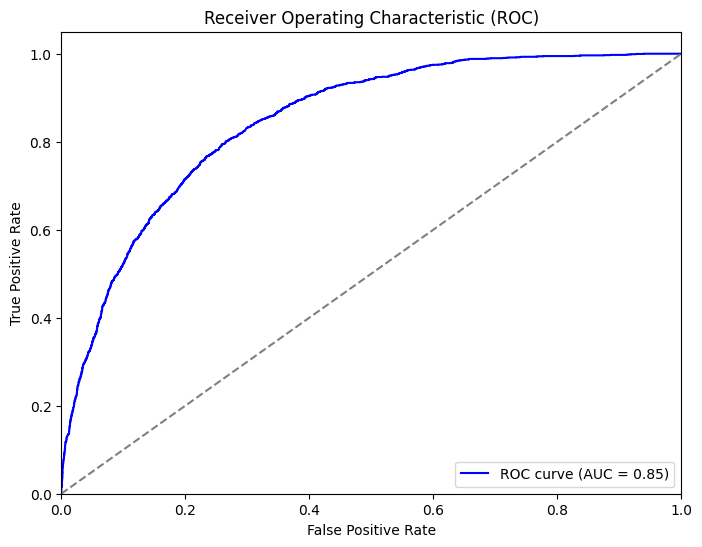

In [35]:
# Train a random forest on full data tree
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42, criterion='entropy', max_depth=4, min_samples_split=10, min_samples_leaf=5, oob_score=True)
rf_clf.fit(X, y)

y_pred = rf_clf.predict(X)

# Access the out-of-bag accuracy
oob_accuracy = rf_clf.oob_score_
print(f"OOB Accuracy: {oob_accuracy:.4f}")

y_proba = rf_clf.predict_proba(X)[:, 1]  # Probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y, y_proba)

auc = roc_auc_score(y, y_proba)
print(f"Area Under the ROC Curve (AUC): {auc:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Dashed diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()